In [1]:
from google.cloud import vision
from google.cloud import storage
from PIL import Image
import numpy as np
import os, sys
import csv  
from io import BytesIO
from IPython import display
import csv

# Our scripts
from corrections import *
from image import * 
from handling import *

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"

### Read all files from the google bucket. Can cycle through the files in this list and write results to the csv file.

In [2]:
all_files = ListAvaliableFiles("guppy_images")
all_jpg_files = [ x for x in all_files if "JPG" in x ]

### Reanalyse and check the accuracy of the algorithm

In [3]:
ReanalysePredictions("Truth", verbose=True)
correct_files, incorrect_files, invalid_files, character_confusions = \
    AccuracyCheck("/Users/jordan/Desktop/Guppies/Data/Truth_new.csv", verbose=False)

Reanalysed predictions

Number Correct: 728 
Number Incorrect: 222 
Number Invalid: 50
Attempted % Correct: 0.7663157894736842
Total % Correct: 0.728


### Opens a file from the google bucket (or locally), crops it, reads it and corrects the output.


Initial label: FTY-6VZP-01/24/13 
Corrected label: FTY-6V2P-01/24/13


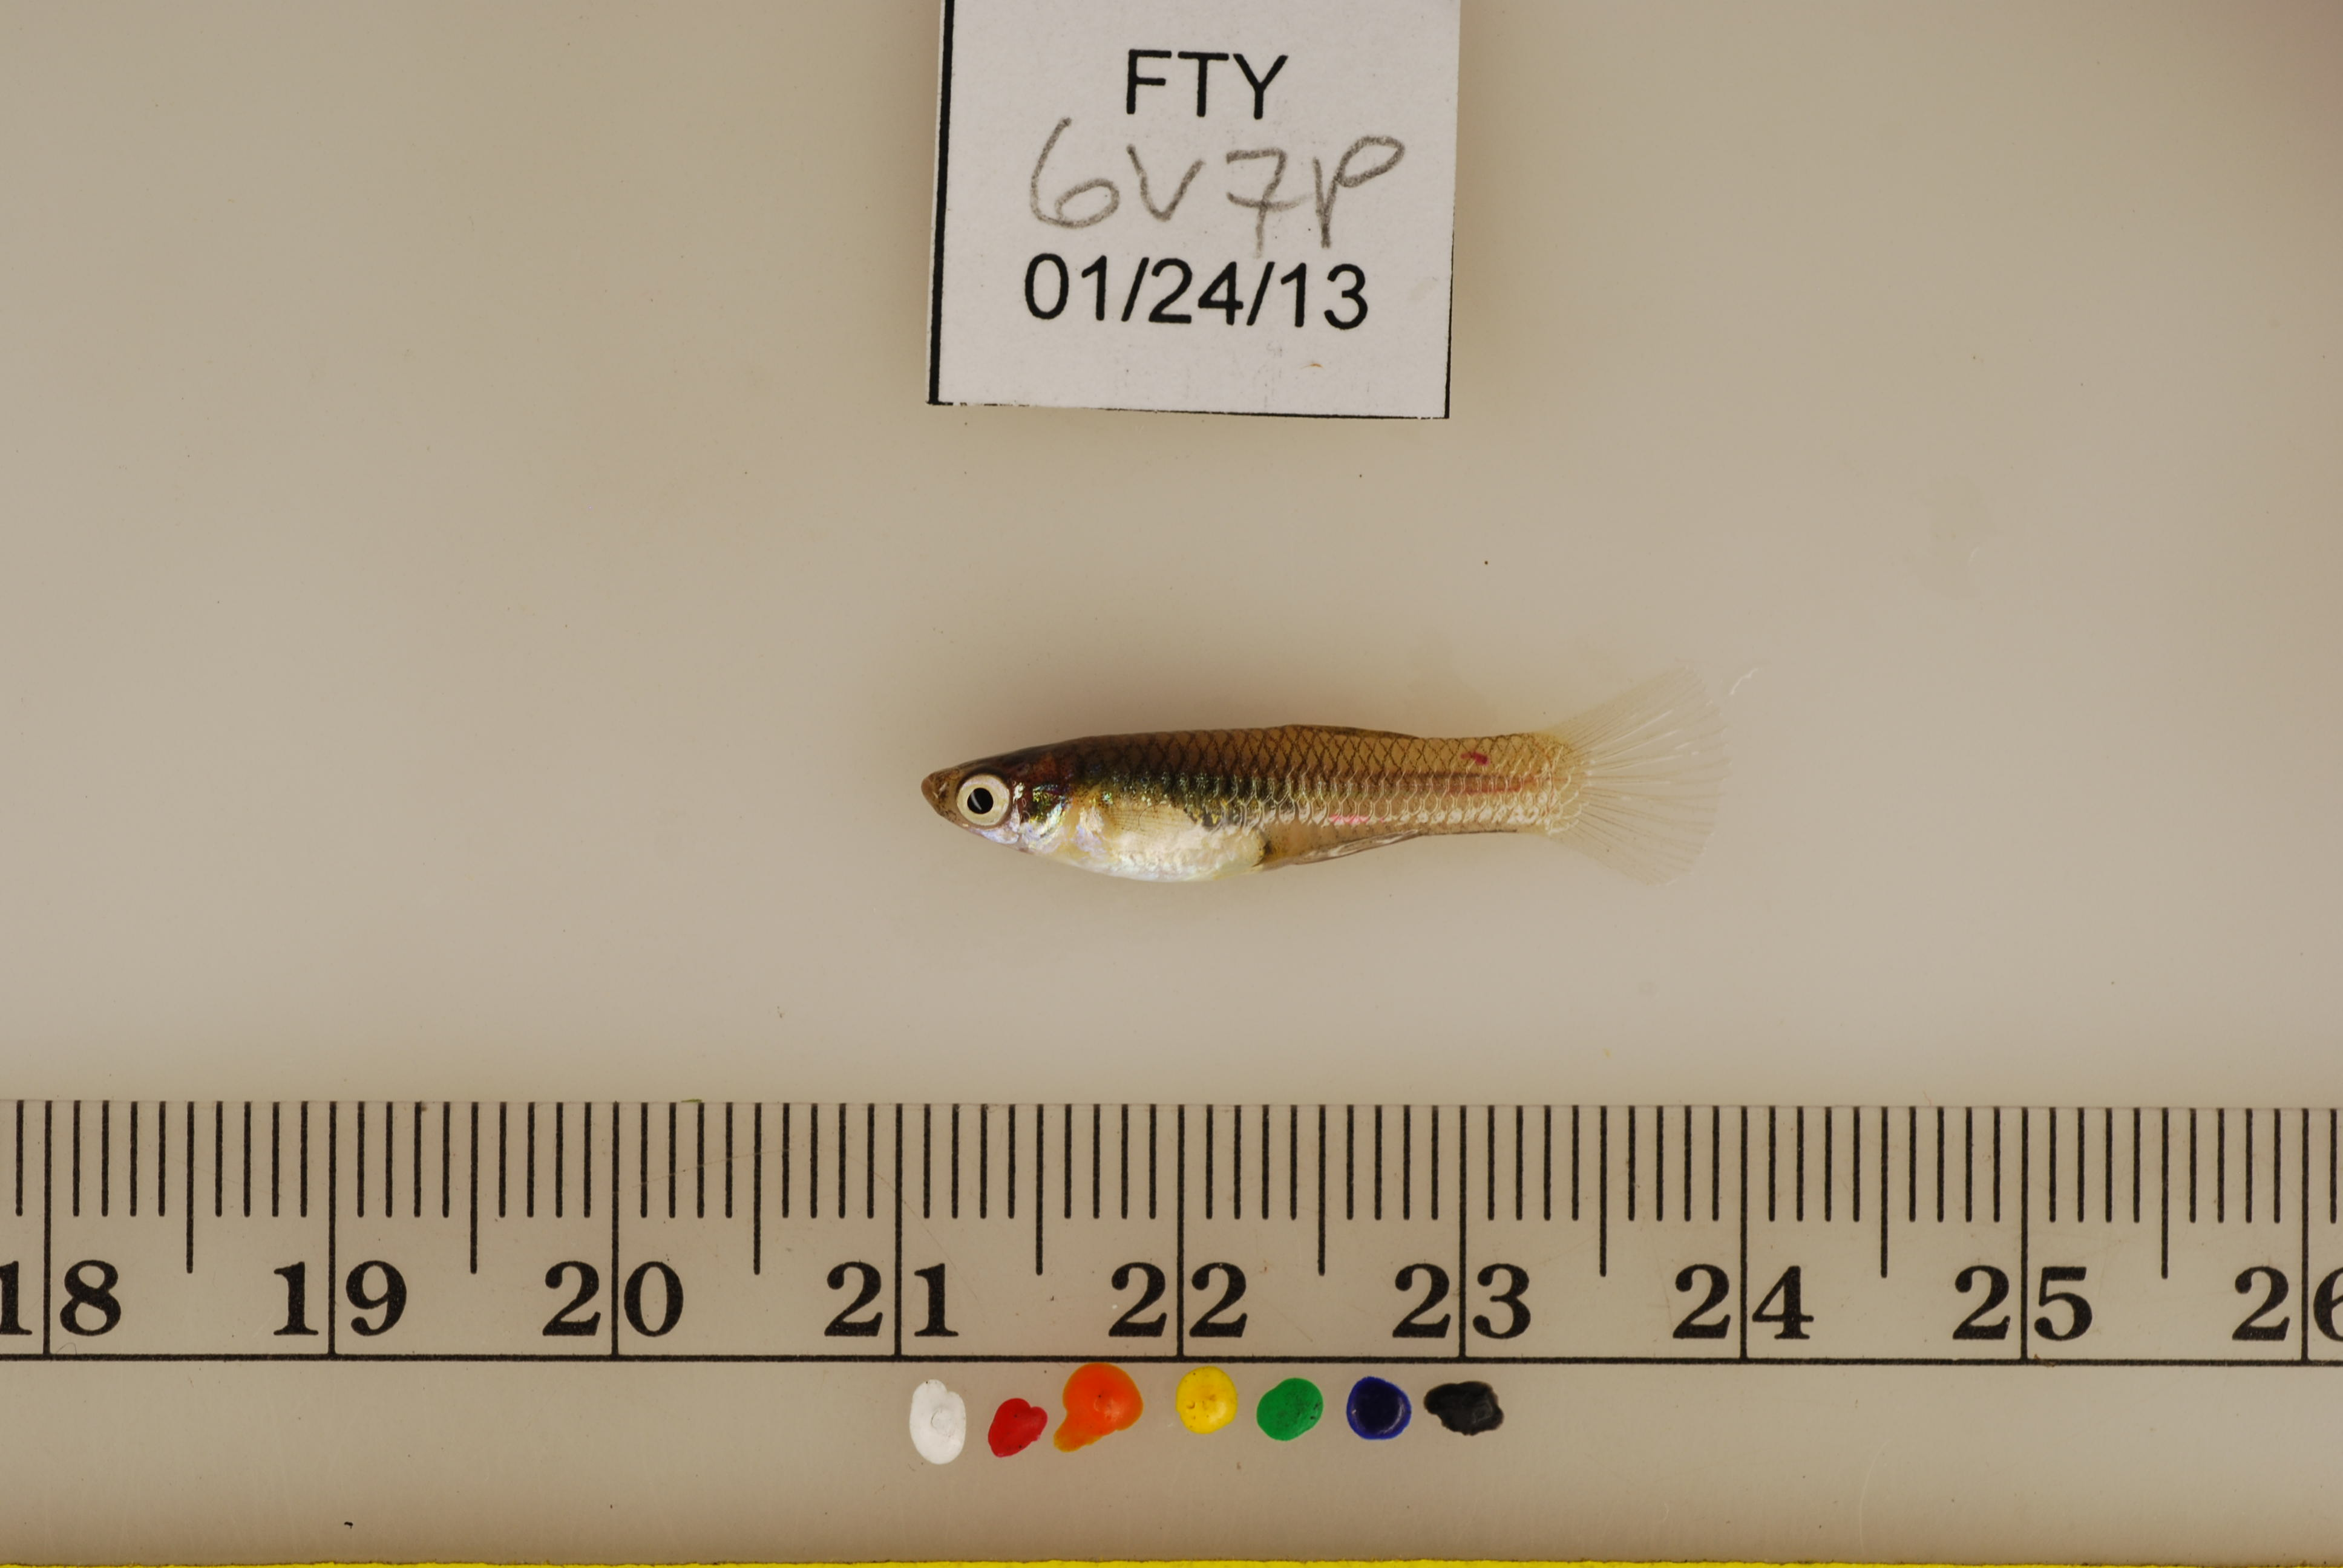

In [4]:
image, initial_label, corrected_label, word_confidences = \
    CorrectedLabel(incorrect_files[15], "remote", verbose=False)

Image.open(image)

### Make the confusion matrix

Text(0, 0.5, 'True Character')

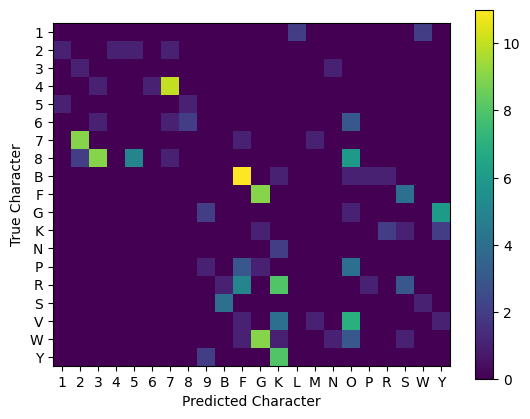

In [7]:
true_chars_unique, pred_chars_unique, confusion_matrix = \
    ConfusionMatrix(character_confusions)

import matplotlib.pyplot as plt
plt.imshow(confusion_matrix)
plt.yticks(np.arange(len(true_chars_unique)), true_chars_unique)
plt.xticks(np.arange(len(pred_chars_unique)), pred_chars_unique)
plt.colorbar()
plt.xlabel("Predicted Character")
plt.ylabel("True Character")

### Only need character_confusions to recover the confusion matrix. Save character confusions to be read directly by the code.

In [9]:
np.save('../Data/character_confusions.npy', character_confusions)

### *Downloads*: Downloads images from the google bucket.

In [ ]:
correct_files, incorrect_files, invalid_files

for i, file in enumerate(incorrect_files):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/IncorrectImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(error_files)))

for i, file in enumerate(correct_files[0:200]):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/CorrectImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(correct_subset)))

for i, file in enumerate(invalid_files):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/InvalidImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(correct_subset)))

### *Interactive*: Write the filename, initial prediction, corrected prediction and the manually inputted truth to the truth.csv file for a set of file names.

In [ ]:
# Read all JPG files. All images are in both .jpg and .nef formats, need to avoid duplicates.
all_files = ListAvaliableFiles("guppy_images")
all_jpg_files = [ x for x in all_files if "JPG" in x ]

# Read the random number array we will use to assign images.
# random_array = np.arange(len(all_jpg_files))
# np.random.shuffle(random_array)
# np.save('../Data/radom_array.npy', random_array)
random_array = np.load('../Data/radom_array.npy')

# Assign images.
Jordan_array = random_array[0:500]
Sunny_array = random_array[500:1000]

Jordan_files = []
Sunny_files = []

for index in Jordan_array:
    Jordan_files.append(all_jpg_files[index])

for index in Sunny_array:
    Sunny_files.append(all_jpg_files[index])

In [ ]:
with open('../Data/truth.csv', 'a') as f:
    writer = csv.writer(f)

    for file in Sunny_files:
        # Read the data and predict the label.
        image = RetreiveImage(file, verbose=False)
        cropped_image = CroppedImage(image, verbose=False)

        display.display(Image.open(cropped_image))
        display.clear_output(wait=True)

        initial_prediction = ReadImage(cropped_image, verbose=False)[0]
        corrected_prediction = FindErrors(initial_prediction)
    
        # Provide truth
        truth = input("Truth:")

        writer.writerow([file, initial_prediction, corrected_prediction, truth])

### Code used to combine truth_sunny and truth_Jordan files.

In [ ]:
# files = ['../Data/truth_Jordan.csv', '../Data/truth_sunny.csv']

# whole_file = []

# for file in files:
#     with open(file, 'r') as f:
#         filereader = csv.reader(f)
#         for row in filereader:
#             if row != []:
#                 whole_file.append(row)


# with open('../Data/Truth.csv', 'w') as Truth:
#     writer = csv.writer(Truth)
#     for row in whole_file:
#         writer.writerow(row)